# Import the necessary libraries


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import ElasticNet, LassoLars, Ridge, LinearRegression, Lasso
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
%matplotlib inline
plt.style.use('ggplot')

#### Load the data into a dataframe

In [ ]:
import seaborn as sns
df = sns.load_dataset("diamonds")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


There are no missing values in the dataset.

Drop the first column and the *x*, *y*,*z* columns as the total depth and the table width will be used for further analysis.

In [ ]:
df.drop(['x','y','z'],inplace=True, axis=1)
df.head()

,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326
2,0.23,Good,E,VS1,56.9,65.0,327
3,0.29,Premium,I,VS2,62.4,58.0,334
4,0.31,Good,J,SI2,63.3,58.0,335


# Data Visualization

Various count plots.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Clarity of the diamond')

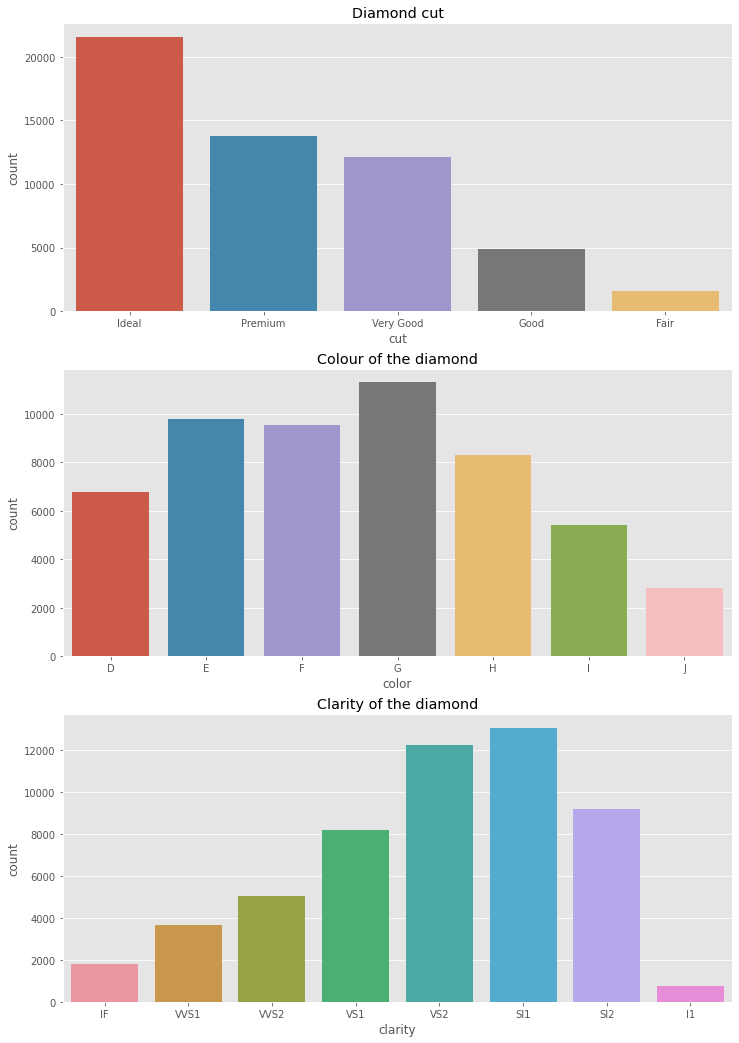

In [ ]:
f, ax = plt.subplots(3, figsize=(12,18))
sns.countplot('cut', data=df, ax=ax[0])
sns.countplot('color', data=df, ax=ax[1])
sns.countplot('clarity', data=df, ax=ax[2])
ax[0].set_title('Diamond cut')
ax[1].set_title('Colour of the diamond')
ax[2].set_title('Clarity of the diamond')

From the above plots, the following observations could be made:
* Quite a lot of diamonds have an *Ideal* cut following by *Premium* and *Very Good.*
* The dataset contains good distribution of various colours, with *I* and *J* having the least number.
* Only a small fraction of the diamonds have the best quality while even smaller fracition of the dianonds have poor quality.

#### Describe the characteristics of the columns containing numeric values.

In [ ]:
df.describe()

,carat,depth,table,price
count,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722
std,0.474011,1.432621,2.234491,3989.439738
min,0.200000,43.000000,43.000000,326.000000
25%,0.400000,61.000000,56.000000,950.000000
50%,0.700000,61.800000,57.000000,2401.000000
75%,1.040000,62.500000,59.000000,5324.250000
max,5.010000,79.000000,95.000000,18823.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'Price distribution')

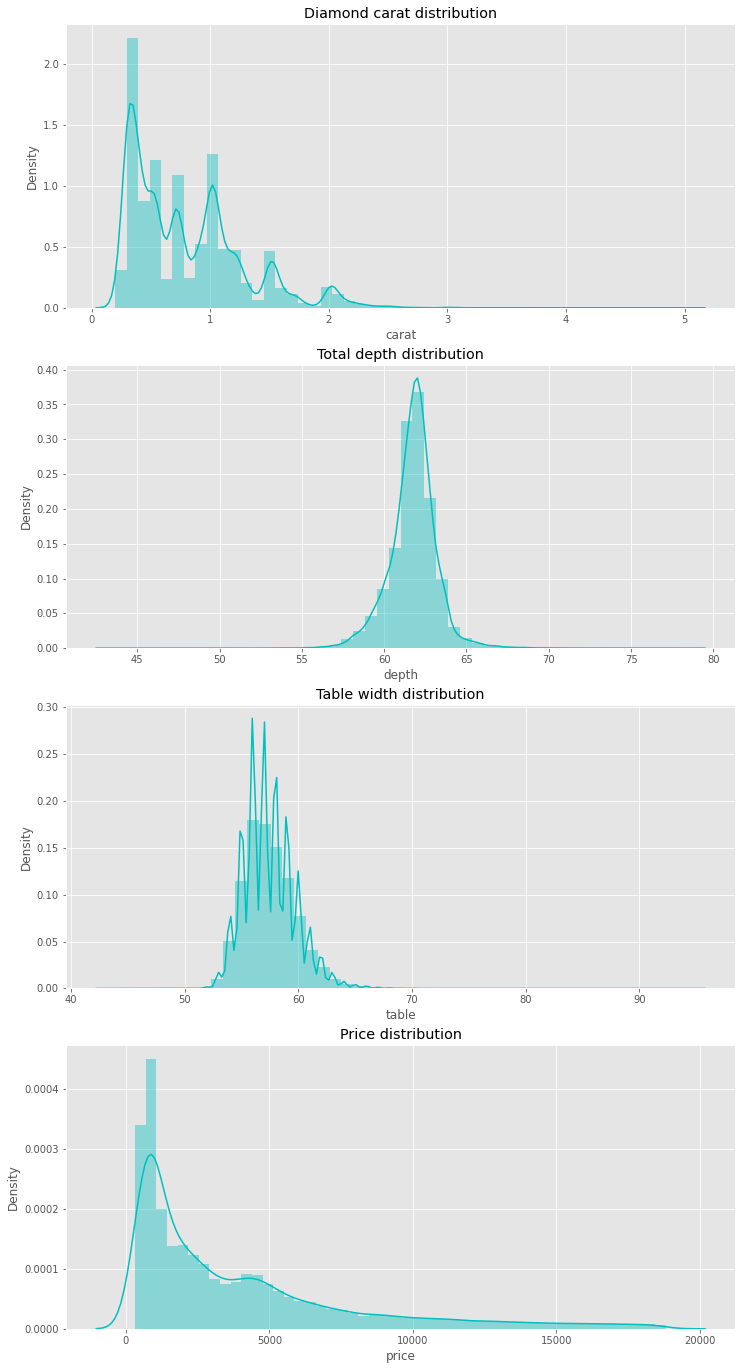

In [ ]:
f, ax = plt.subplots(4, figsize=(12,24))
sns.distplot(df.carat,color='c',ax=ax[0])
sns.distplot(df.depth,color='c',ax=ax[1])
sns.distplot(df.table,color='c',ax=ax[2])
sns.distplot(df.price,color='c',ax=ax[3])
ax[0].set_title('Diamond carat distribution')
ax[1].set_title('Total depth distribution')
ax[2].set_title('Table width distribution')
ax[3].set_title('Price distribution')

* Most of the diamonds in the dataset are below 2 carats.
* The depth peaks at around 62.
* Table width peaks around 58.
* Most of the diamonds in the dataset sold are less than $5000.

#### More plots to understand the variation of price

Text(0.5, 1.0, 'Clarity vs Price')

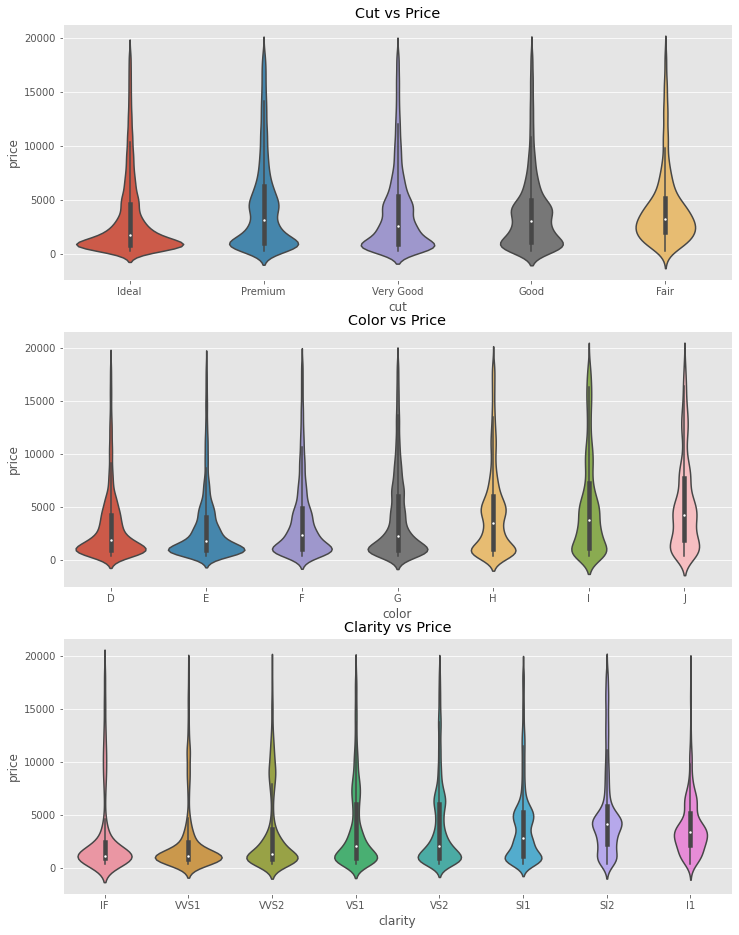

In [ ]:
f, ax = plt.subplots(3,figsize=(12,16))
sns.violinplot(x='clarity',y='price',data=df,ax=ax[2])
sns.violinplot(x='color',y='price',data=df,ax=ax[1])
sns.violinplot(x='cut',y='price',data=df,ax=ax[0])
ax[0].set_title('Cut vs Price')
ax[1].set_title('Color vs Price')
ax[2].set_title('Clarity vs Price')

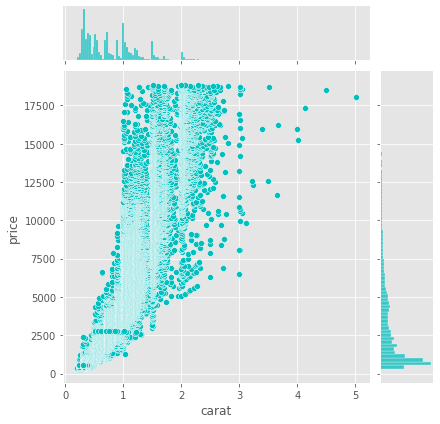

In [ ]:
sns.jointplot(x='carat',y='price',data=df,color='c')

# Regression

Convert the non-numeric data into numbers.

In [ ]:
le = LabelEncoder()
df.cut = le.fit_transform(df.cut)
df.color = le.fit_transform(df.color)
df.clarity = le.fit_transform(df.clarity)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int64  
 2   color    53940 non-null  int64  
 3   clarity  53940 non-null  int64  
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 2.9 MB


In [ ]:
x = df.drop('price',axis=1)
y = df.price

In [ ]:
x_train,x_, y_train,y_ = train_test_split(x,y,test_size=0.15,random_state=25)
x_dev,x_test,y_dev,y_test = train_test_split(x_,y_,test_size=0.5,random_state=25)

In [ ]:
sc = StandardScaler()
sc.fit(x_train)
sc.transform(x_train)
sc.transform(x_dev)

array([[ 1.71946135, -1.51372482,  0.82693085, -0.48325696,  1.43459528,
         2.03212778],
       [-0.20453712, -0.54010181, -1.52625565, -1.06267244,  0.17432916,
        -1.55070835],
       [-0.96567936, -0.54010181, -0.93795903,  0.09615853, -0.38578911,
        -0.2071448 ],
       ...,
       [ 2.67088916,  0.43352121,  0.23863423, -0.48325696,  0.66443265,
         0.24070971],
       [ 2.58631779, -0.54010181,  1.41522748, -0.48325696,  0.31435873,
        -0.2071448 ],
       [-0.18339428,  1.40714422,  2.0035241 ,  0.09615853,  1.64463963,
         0.24070971]])

#### Linear Model

In [ ]:
clf = LinearRegression()
clf.fit(x_train,y_train)
print('Training score: {:0.3f}'.format(r2_score(y_train,clf.predict(x_train))))
print('Training MSE: {:0.3f}'.format(mean_squared_error(y_train,clf.predict(x_train))))
print('Dev set score: {:0.3f}'.format(r2_score(y_dev,clf.predict(x_dev))))
print('Dev set MSE: {:0.3f}'.format(mean_squared_error(y_dev,clf.predict(x_dev))))
print('Coefficients: {}\n Intercept: {}'.format(clf.coef_,clf.intercept_))

Training score: 0.879
Training MSE: 1916164.134
Dev set score: 0.887
Dev set MSE: 1871526.827
Coefficients: [8347.19936611   79.76780375 -258.89445323  300.98909415 -105.752963
  -94.94366816]
 Intercept: 8574.098446685823


In [ ]:
clf = ElasticNet(alpha=1)
clf.fit(x_train,y_train)
print('Training score: {:0.3f}'.format(r2_score(y_train,clf.predict(x_train))))
print('Training MSE: {:0.3f}'.format(mean_squared_error(y_train,clf.predict(x_train))))
print('Dev set score: {:0.3f}'.format(r2_score(y_dev,clf.predict(x_dev))))
print('Dev set MSE: {:0.3f}'.format(mean_squared_error(y_dev,clf.predict(x_dev))))
print('Coefficients: {}\n Intercept: {}'.format(clf.coef_,clf.intercept_))

Training score: 0.443
Training MSE: 8828862.576
Dev set score: 0.449
Dev set MSE: 9091249.872
Coefficients: [2304.50397481   69.00321428  177.65417408  -10.28519841    6.49496713
  115.62039385]
 Intercept: -5554.033687871348


In [ ]:
clf = Ridge(alpha=10)
clf.fit(x_train,y_train)
print('Training score: {:0.3f}'.format(r2_score(y_train,clf.predict(x_train))))
print('Training MSE: {:0.3f}'.format(mean_squared_error(y_train,clf.predict(x_train))))
print('Dev set score: {:0.3f}'.format(r2_score(y_dev,clf.predict(x_dev))))
print('Dev set MSE: {:0.3f}'.format(mean_squared_error(y_dev,clf.predict(x_dev))))
print('Coefficients: {}\n Intercept: {}'.format(clf.coef_,clf.intercept_))

Training score: 0.879
Training MSE: 1916181.787
Dev set score: 0.887
Dev set MSE: 1871687.927
Coefficients: [8337.5406649    79.78748565 -258.13021153  300.47142919 -105.54934507
  -94.58500916]
 Intercept: 8548.562606190364


In [ ]:
clf = LassoLars(alpha=1)
clf.fit(x_train,y_train)
print('Training score: {:0.3f}'.format(r2_score(y_train,clf.predict(x_train))))
print('Training MSE: {:0.3f}'.format(mean_squared_error(y_train,clf.predict(x_train))))
print('Dev set score: {:0.3f}'.format(r2_score(y_dev,clf.predict(x_dev))))
print('Dev set MSE: {:0.3f}'.format(mean_squared_error(y_dev,clf.predict(x_dev))))
print('Coefficients: {}\n Intercept: {}'.format(clf.coef_,clf.intercept_))

Training score: 0.863
Training MSE: 2174604.695
Dev set score: 0.870
Dev set MSE: 2150036.318
Coefficients: [7497.14829875    0.          -76.90373829  149.1589889     0.
    0.        ]
 Intercept: -2420.9284488862245


In [ ]:
clf = Lasso(alpha=40)
clf.fit(x_train,y_train)
print('Training score: {:0.3f}'.format(r2_score(y_train,clf.predict(x_train))))
print('Training MSE: {:0.3f}'.format(mean_squared_error(y_train,clf.predict(x_train))))
print('Dev set score: {:0.3f}'.format(r2_score(y_dev,clf.predict(x_dev))))
print('Dev set MSE: {:0.3f}'.format(mean_squared_error(y_dev,clf.predict(x_dev))))
print('Coefficients: {}\n Intercept: {}'.format(clf.coef_,clf.intercept_))

Training score: 0.878
Training MSE: 1931622.554
Dev set score: 0.885
Dev set MSE: 1891407.273
Coefficients: [8097.41831059   44.0941616  -227.44309042  278.06543712  -81.42041451
  -72.46411952]
 Intercept: 6076.248666148422


### Polynomial model

LassoLars and ElasticNet were not chosen for further analysis due to poor performance.

In [ ]:
poly = PolynomialFeatures(2)
x_train = poly.fit_transform(x_train)
x_dev = poly.fit_transform(x_dev)

In [ ]:
clf = LinearRegression()
clf.fit(x_train,y_train)
print('Training score: {:0.3f}'.format(r2_score(y_train,clf.predict(x_train))))
print('Training MSE: {:0.3f}'.format(mean_squared_error(y_train,clf.predict(x_train))))
print('Dev set score: {:0.3f}'.format(r2_score(y_dev,clf.predict(x_dev))))
print('Dev set MSE: {:0.3f}'.format(mean_squared_error(y_dev,clf.predict(x_dev))))
print('Coefficients: {}\n Intercept: {}'.format(clf.coef_,clf.intercept_))

Training score: 0.916
Training MSE: 1339429.408
Dev set score: 0.921
Dev set MSE: 1307905.764
Coefficients: [-1.33547108e-10  2.30289051e+04 -4.31795691e+02 -3.71866337e+02
 -7.79551225e+02  1.03300775e+03 -1.05563198e+03  1.70442215e+03
  1.64004981e+02 -5.54358754e+02  8.30368972e+02 -2.03823849e+02
 -1.24647594e+02 -5.88107484e+01 -1.25111246e+01 -5.29485925e+00
  1.08488700e+01  3.84369038e-02 -4.07146920e+01 -6.84150686e+01
  8.31017821e+00  9.26919457e+00  4.85183855e+01  3.63199535e+00
  1.00002045e+00 -1.35218245e+01  1.19790968e+01  2.97579828e+00]
 Intercept: -5114.088806267233


In [ ]:
clf = Ridge(alpha=10)
clf.fit(x_train,y_train)
print('Training score: {:0.3f}'.format(r2_score(y_train,clf.predict(x_train))))
print('Training MSE: {:0.3f}'.format(mean_squared_error(y_train,clf.predict(x_train))))
print('Dev set score: {:0.3f}'.format(r2_score(y_dev,clf.predict(x_dev))))
print('Dev set MSE: {:0.3f}'.format(mean_squared_error(y_dev,clf.predict(x_dev))))
print('Coefficients: {}\n Intercept: {}'.format(clf.coef_,clf.intercept_))

Training score: 0.914
Training MSE: 1357393.396
Dev set score: 0.920
Dev set MSE: 1319283.545
Coefficients: [ 0.00000000e+00  4.53806844e+03 -2.47713342e+02  8.85354742e+02
 -1.46607403e+03  7.69625058e+02 -7.31198134e+02  1.64141829e+03
  2.10837843e+02 -5.52275103e+02  8.44941649e+02 -2.56531441e+00
 -2.05435314e+01 -6.50965391e+01 -1.56998071e+01 -5.05107606e+00
  1.11660208e+01 -3.32137601e+00 -4.01333341e+01 -6.89180982e+01
 -6.33017005e+00  3.23631199e+00  4.75968814e+01  1.19793813e+01
  3.96060006e+00 -1.16749517e+01  9.70060960e+00  7.65646837e-01]
 Intercept: 851.9622602191521


In [ ]:
clf = Lasso(alpha=30,max_iter=5000)
clf.fit(x_train,y_train)
print('Training score: {:0.3f}'.format(r2_score(y_train,clf.predict(x_train))))
print('Training MSE: {:0.3f}'.format(mean_squared_error(y_train,clf.predict(x_train))))
print('Dev set score: {:0.3f}'.format(r2_score(y_dev,clf.predict(x_dev))))
print('Dev set MSE: {:0.3f}'.format(mean_squared_error(y_dev,clf.predict(x_dev))))
print('Coefficients: {}\n Intercept: {}'.format(clf.coef_,clf.intercept_))

Training score: 0.911
Training MSE: 1404666.084
Dev set score: 0.918
Dev set MSE: 1359046.007
Coefficients: [   0.            0.           -0.            0.           -0.
    0.           -0.         1102.40698119   72.49408308 -422.57771142
  738.9451404    36.2307181    41.46572169  -78.60536119   -0.
   -7.56449988    8.97006446   -2.31173247  -43.21174674  -52.78476439
    4.74851383    3.55938925   39.11962234   -3.86019781   -2.60246371
   -2.92630482    4.2774816    -2.98745456]
 Intercept: 3890.7712584725814


All the three models showed comparable performance but Lasso was chosen as it had a simpler model due to sparsity.

In [ ]:
sc.transform(x_test)
x_test = poly.transform(x_test)
print('Test set score: {:0.3f}'.format(r2_score(y_test,clf.predict(x_test))))
print('Test set MSE: {:0.3f}'.format(mean_squared_error(y_test,clf.predict(x_test))))

Test set score: 0.914
Test set MSE: 1376658.028
